# The Thief's Dilemma
The thief's problem is to determine which items to steal in order to maximize the total value of the loot, while staying within the maximum weight limit of the bag.

## Libraries

In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tqdm import tqdm
from time import sleep
import pygad
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##Let's set up the problem
We've got several valuables at home - we want our loot worth as much as possible without exceeding the weight limit:

In [ ]:
"""key: [item, value, weight]"""
house = {
    1: ['clock', 100, 7],
    2: ['landscape painting', 300, 7],
    3: ['portrait', 200, 6],
    4: ['radio', 40, 2],
    5: ['laptop', 500, 5],
    6: ['small lamp', 70, 6],
    7: ['silverware', 100, 1],
    8: ['porcelain', 250, 3],
    9: ['bronze figurine', 300, 10],
    10: ['leather purse', 280, 3],
    11: ['vaccum cleaner', 300, 15],
    12: ['tv', 600, 20],
    13: ['car', 1000, 20],
    14: ['mirror', 400, 2],
    15: ['phone', 1000, 1],
    16: ['pot flower', 100, 5],
    17: ['watering can', 50, 1],
    18: ['documents', 2000, 1],
    19: ['chair', 200, 5],
    20: ['iPad', 700, 2]
}

How many combinations of loot are there?

In [ ]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [ ]:
combinations = list(powerset(list(house.keys())))

In [ ]:
len(combinations)

1048576

Let's establish the maximum lifting weight:

In [ ]:
max_weight = 35

Let's establish the best possible solution:

In [ ]:
results = []
for indexes in combinations:
  money = 0
  weight = 0
  for index in indexes:
    weight += house[index][2]
    if weight > max_weight:
      break
    else:
      money += house[index][1]
  results.append(money)

In [ ]:
max(results)

5980

Extract the values and weights of all available items and calculate their totals.

*Hint: Use lists to store item values and weights. Then, calculate the total value and total weight of all items using numpy operations.*

In [ ]:
items_value = []
items_weight = []
for index in range(len(house)):
    key = index + 1
    items_value.append(house.get(key)[1])
    items_weight.append(house.get(key)[2])

print(f"Value of all items: {np.sum(items_value)} and their weight: {np.sum(items_weight)}")

Value of all items: 8490 and their weight: 122


Define fitness functions (without normalization).

*Hint: The fitness function needs to evaluate both the value and weight of the items in the solution. If the weight exceeds the maximum weight, the function should penalize the fitness by subtracting the total value of all items. Consider using chunks of code from establishing best solution before and remember what arguments a PyGAD fitness function must take ;)*

In [ ]:
def fit_fun_not_norm(genetic_algorithm_instance, solution, solution_idx):
    weight = 0
    fitness_value = 0

    for index in range(len(solution)):
        key = index + 1
        if solution[index] == 1:
            fitness_value += house.get(key)[1]
            weight += house.get(key)[2]
            if weight > max_weight:
                fitness_value -= np.sum(items_value)  # 8490

    return fitness_value

Additional task: Define normalized fitness function

In [ ]:
def fit_fun_norm(genetic_algorithm_instance, solution, solution_idx):
    weight = 0
    fitness_value = 0

    for index in range(len(solution)):
        key = index + 1
        if solution[index] == 1:
            fitness_value += house.get(key)[1]
            weight += house.get(key)[2]
            if weight > max_weight:
                fitness_value = 0

    fitness_value = fitness_value / np.sum(items_value)  # fitness_value = fitness_value / 8490

    return fitness_value

Using tqdm generate progress bar.

*Hint: The tqdm library is useful for showing the progress of loops. You can wrap any iterable (like range) with tqdm to automatically display a progress bar while the loop is running.*

In [ ]:
a = 0
for _ in tqdm(range(10)):
    a += 1
    print(a)
    sleep(3)
print(a)

  0%|          | 0/10 [00:00<?, ?it/s]

1


 10%|█         | 1/10 [00:03<00:27,  3.00s/it]

2


 20%|██        | 2/10 [00:06<00:24,  3.00s/it]

3


 30%|███       | 3/10 [00:09<00:21,  3.00s/it]

4


 40%|████      | 4/10 [00:12<00:18,  3.00s/it]

5


 50%|█████     | 5/10 [00:15<00:15,  3.00s/it]

6


 60%|██████    | 6/10 [00:18<00:12,  3.00s/it]

7


 70%|███████   | 7/10 [00:21<00:09,  3.00s/it]

8


 80%|████████  | 8/10 [00:24<00:06,  3.00s/it]

9


 90%|█████████ | 9/10 [00:27<00:03,  3.00s/it]

10


100%|██████████| 10/10 [00:30<00:00,  3.00s/it]

10


## Genetic algorithm

Global settings of the algorithm.

In [ ]:
gene_space=[0, 1]
num_generations=100
num_parents_mating=15
sol_per_pop=40
num_genes=len(house)
parent_selection_type="tournament"
keep_parents=5
crossover_type="single_point"
mutation_type="random"
mutation_probability=0.02

Empty lists to store the results.



In [ ]:
solution_list_not_norm = []
solution_fitness_list_not_norm = []

Write a loop to run the algorithm using a non-normalized fitness function.

*Hint: You can use pygad.GA to set up the genetic algorithm and run it for multiple generations. Ensure to specify the fitness_func as fit_fun_not_norm and collect the best solution and its fitness after each run.*

In [ ]:
for _ in tqdm(range(100)):
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fit_fun_not_norm,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_probability=mutation_probability
    )

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    solution_list_not_norm.append(solution)
    solution_fitness_list_not_norm.append(solution_fitness)

solution_list_not_norm = np.array(solution_list_not_norm)
solution_fitness_list_not_norm = np.array(solution_fitness_list_not_norm)

100%|██████████| 100/100 [00:20<00:00,  4.80it/s]


Additional: Write a loop to run the algorithm using a normalized fitness function.

In [ ]:
solution_list_norm = []
solution_fitness_list_norm = []


for _ in tqdm(range(100)):
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fit_fun_norm,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_probability=mutation_probability
    )

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    solution_list_norm.append(solution)
    solution_fitness_list_norm.append(solution_fitness)

solution_list_norm = np.array(solution_list_norm)
solution_fitness_list_norm = np.array(solution_fitness_list_norm)

100%|██████████| 100/100 [00:19<00:00,  5.10it/s]


## Graphical presentation of the results

Plot the history of fitness values of solutions over the iterations of the genetic algorithm.

Additional: Include both the non-normalised and normalised versions in separate subplots.

*Hint: Use line plots to visualize how the fitness values evolved during the algorithm's execution.*

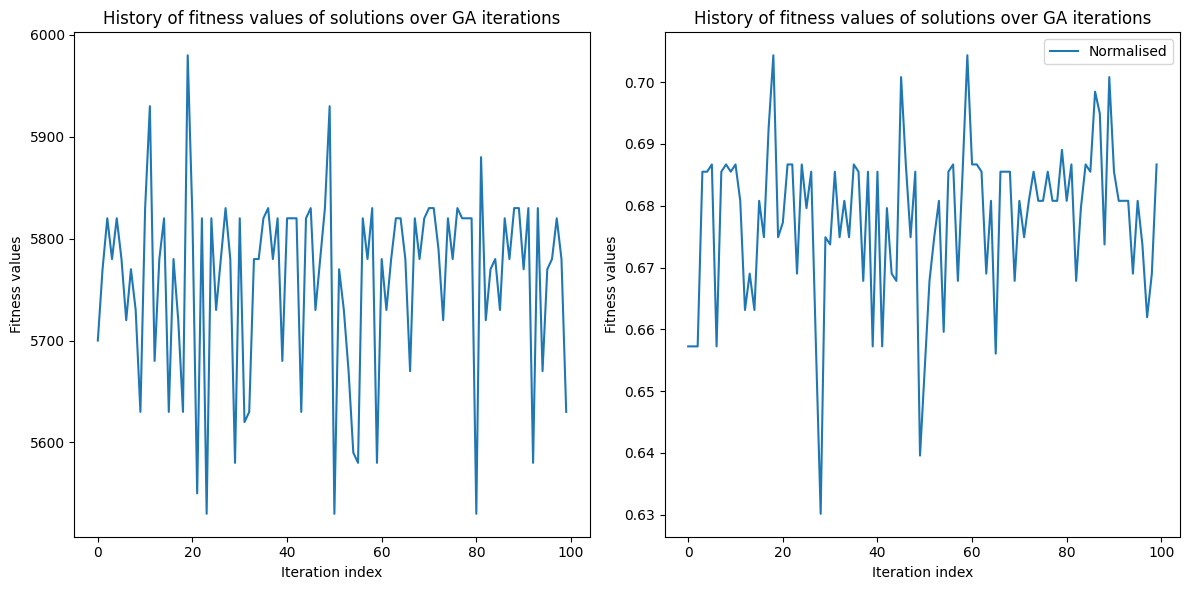

In [ ]:
fig = plt.figure(figsize=(12,6))

"""Not normalised"""
ax1 = fig.add_subplot(121)  # 1x2 grid, pos. 1
ax1.plot(solution_fitness_list_not_norm, label='Not normalised')
ax1.set_title('History of fitness values of solutions over GA iterations')
ax1.set_xlabel('Iteration index')
ax1.set_ylabel('Fitness values')

"""Normalised"""
ax1 = fig.add_subplot(122)  # 1x2 grid, pos. 2
ax1.plot(solution_fitness_list_norm, label='Normalised')
ax1.set_title('History of fitness values of solutions over GA iterations')
ax1.set_xlabel('Iteration index')
ax1.set_ylabel('Fitness values')

plt.legend()
plt.tight_layout()
plt.show()

Create a histogram showing the distribution of fitness values of the best solutions. Include both the normalised and non-normalised values.

*Hint: Convert the data to a DataFrame before plotting.*

In [ ]:
data_fitness = pd.DataFrame(
    data={
        'normalised': solution_fitness_list_norm,
        'not normalised': solution_fitness_list_not_norm / np.sum(items_value)
    }
)
data_fitness.sample(10)

,normalised,not normalised
58,0.685512,0.686690
78,0.680801,0.685512
81,0.686690,0.692580
80,0.680801,0.651355
94,0.669022,0.667845
76,0.685512,0.686690
41,0.657244,0.685512
2,0.657244,0.685512
12,0.663133,0.669022
3,0.685512,0.680801


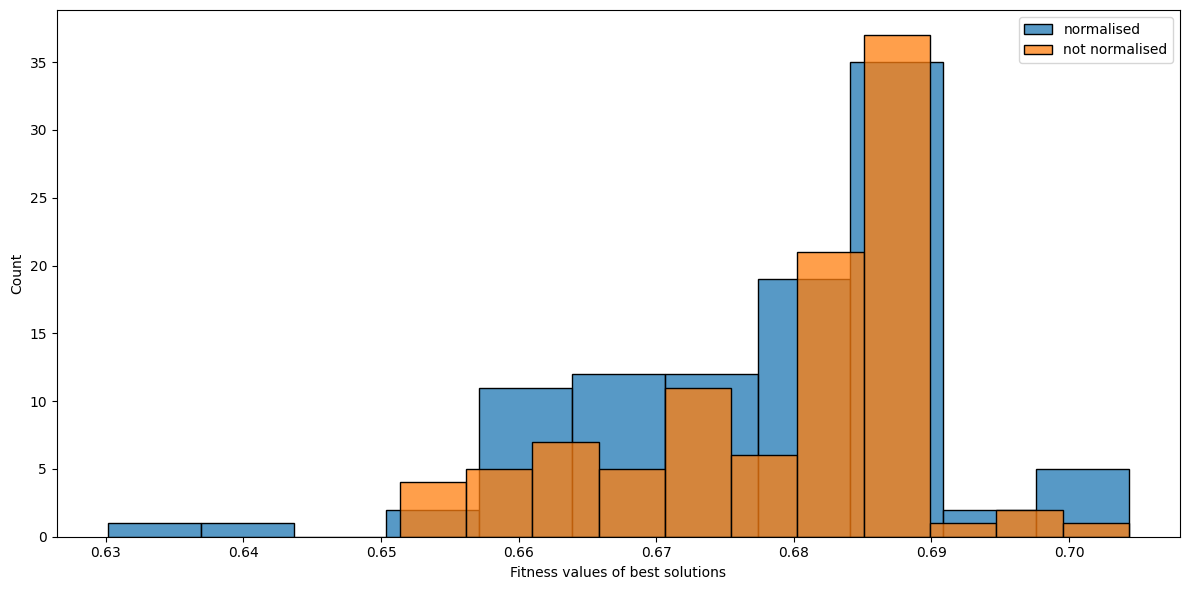

In [ ]:
plt.figure(figsize=(12,6))

hist1 = sns.histplot(data=data_fitness, x='normalised', label='normalised')
hist1.set(xlabel='Fitness values of best solutions')
hist2 = sns.histplot(data=data_fitness, x='not normalised', label='not normalised')

plt.legend()
plt.tight_layout()
plt.show()

Identify all solutions that reached the maximum fitness value.

*Hint: You can iterate through the fitness values and compare them to the known maximum (e.g. 5980) to find the corresponding solutions*

In [ ]:
best_solutions = []
for index in range(len(solution_fitness_list_not_norm)):
    if solution_fitness_list_not_norm[index] == 5980:
        best_solutions.append(solution_list_not_norm[index])

In [ ]:
len(best_solutions)

1

From the list of best solutions, filter out duplicates to keep only the unique ones. Compare the solution vectors element-wise to check for equality.

*Hint: Start by assuming the first solution is unique. Then iterate through the others and check if they differ in at least one parameter*

In [ ]:
first_sol = best_solutions[0]
unique_solutions = [first_sol]
for index in range(len(best_solutions) - 1):
    current_sol = best_solutions[index + 1]
    result = [a == b for a, b in zip(first_sol, current_sol)]
    if not all(result):
        unique_solutions.append(current_sol)

In [ ]:
len(unique_solutions)

1

Based on the first best solution, extract and display the items selected for the knapsack. Use the binary representation to determine which items are included.

*Hint: Iterate over the binary values of the solution. If the value is 1, add the corresponding item from the data source (e.g. house) to the knapsack list.*

In [ ]:
backpack = []
index = 1
for choice in first_sol:
    if int(choice) == 1:
        backpack.append(house.get(index)[0])
    index += 1
backpack

['laptop',
 'silverware',
 'leather purse',
 'car',
 'mirror',
 'phone',
 'documents',
 'iPad']